In [6]:
%pip install nltk

In [2]:
import numpy as np
import string
import nltk

Reading the text file

In [3]:
file = open("text_data/001ssb.txt" , "r")
corpus = file.read()
file.close()

print(corpus)

A Game Of Thrones 
Book One of A Song of Ice and Fire 
By George R. R. Martin 
PROLOGUE 
"We should start back," Gared urged as the woods began to grow dark around them. "The wildlings are 
dead." 
"Do the dead frighten you?" Ser Waymar Royce asked with just the hint of a smile. 
Gared did not rise to the bait. He was an old man, past fifty, and he had seen the lordlings come and go. 
"Dead is dead," he said. "We have no business with the dead." 
"Are they dead?" Royce asked softly. "What proof have we?" 
"Will saw them," Gared said. "If he says they are dead, that's proof enough for me." 
Will had known they would drag him into the quarrel sooner or later. He wished it had been later rather 
than sooner. "My mother told me that dead men sing no songs," he put in. 
"My wet nurse said the same thing, Will," Royce replied. "Never believe anything you hear at a woman's 
tit. There are things to be learned even from the dead." His voice echoed, too loud in the twilit forest. 
Page 1

"We h

Preprocessing of data

In [4]:
corpus = corpus.lower()
# print(corpus)

In [5]:
# to remove punctuations
exclude = string.punctuation

def remove_pun (text):
    return text.translate(str.maketrans("" ,"", exclude))

corpus = remove_pun(corpus)

# print(corpus)

In [6]:
# Remove stop words

from nltk.corpus import stopwords
nltk.download('stopwords')
# stopwords.words("english")

def remove_stop_words(text):
    next_text = []

    for word in text.split():
        if word in stopwords.words("english"):
            next_text.append('')
        else:
            next_text.append(word)
    x = next_text[:]
    next_text.clear()
    return " ".join(x)

corpus = remove_stop_words(corpus)

print(corpus)

        


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 game  thrones book one   song  ice  fire  george r r martin prologue   start back gared urged   woods began  grow dark around   wildlings  dead   dead frighten  ser waymar royce asked    hint   smile gared   rise   bait    old man past fifty    seen  lordlings come  go dead  dead  said    business   dead   dead royce asked softly  proof    saw  gared said   says   dead thats proof enough     known  would drag    quarrel sooner  later  wished    later rather  sooner  mother told   dead men sing  songs  put   wet nurse said   thing  royce replied never believe anything  hear   womans tit   things   learned even   dead  voice echoed  loud   twilit forest page 1    long ride  us gared pointed  eight days maybe nine  night  falling ser waymar royce glanced   sky  disinterest    every day   time   unmanned   dark gared  could see  tightness around gareds mouth  barely sup pressed anger   eyes   thick black hood   cloak gared  spent forty years   nights watch man  boy     accustomed   made l

In [7]:
# Tokernisation
from nltk.tokenize import word_tokenize
nltk.download('punkt')

final_corpus = word_tokenize(corpus)

# print(final_corpus)

len(final_corpus)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


152760

Creating Bigrams and Vocalbulary

In [8]:
# Vocalbulary

all_words = final_corpus

all_words = list(set(all_words))

print(len(final_corpus))
print(len(all_words))
print(all_words)


152760
12382
['rhaenys', 'seventeen', 'stout', 'fell', 'trotting', 'fractured', 'dab', 'distrusting', 'nowtook', 'beds', '374', 'chimed', 'gunthor', '295', 'bedsilks', '0', 'glimmer', 'robbthese', 'dressed', 'bitter', 'inflamed', 'baby', 'spare', 'myas', 'khalasar', 'loath', 'love', 'disreputable', 'pretend', 'redhaired', 'submitted', 'scour', 'ranks', 'pycelles', 'payne', 'shape', 'duurs', 'lizardlion', 'left', 'recover', 'smirk', 'wizards', 'kills', 'hid', 'flapped', 'shriek', 'shocking', 'potshops', 'toads', 'frequented', 'rebellion', 'marching', 'gay', '203', 'course', 'capable', 'beat', 'supposed', 'faith', '119', 'pelts', 'cuts', 'unpleasant', 'rack', 'flatfaced', 'decrees', 'casing', 'maid', 'armorers', 'quarrymans', 'arbor', 'travesty', 'waynwood', 'groaned', 'bade', 'truth', 'recovered', 'deepwater', 'uncover', 'closeted', 'unharmed', 'hug', 'abandon', 'fire', 'stored', 'gauntlet', 'slipped', 'pain', 'remade', 'ashara', 'fidgeting', 'guilts', 'dress', 'thief', 'purplish', 'lic

In [9]:
# Bigrams for first 300 words 
length = 300
royaldata = final_corpus[:length]
bigrams = []

for i in range (length-1):
    for j in range (i+1 , length):
        bigrams.append([royaldata[i] , royaldata[j]])
        bigrams.append([royaldata[j] , royaldata[i]])

print(len(bigrams))
# print(bigrams)


89700


One hot Encoding  

In [10]:
word_dict = {}

counter = 0
for word in all_words:
    word_dict[word] = counter
    counter += 1
print(word_dict) 


{'rhaenys': 0, 'seventeen': 1, 'stout': 2, 'fell': 3, 'trotting': 4, 'fractured': 5, 'dab': 6, 'distrusting': 7, 'nowtook': 8, 'beds': 9, '374': 10, 'chimed': 11, 'gunthor': 12, '295': 13, 'bedsilks': 14, '0': 15, 'glimmer': 16, 'robbthese': 17, 'dressed': 18, 'bitter': 19, 'inflamed': 20, 'baby': 21, 'spare': 22, 'myas': 23, 'khalasar': 24, 'loath': 25, 'love': 26, 'disreputable': 27, 'pretend': 28, 'redhaired': 29, 'submitted': 30, 'scour': 31, 'ranks': 32, 'pycelles': 33, 'payne': 34, 'shape': 35, 'duurs': 36, 'lizardlion': 37, 'left': 38, 'recover': 39, 'smirk': 40, 'wizards': 41, 'kills': 42, 'hid': 43, 'flapped': 44, 'shriek': 45, 'shocking': 46, 'potshops': 47, 'toads': 48, 'frequented': 49, 'rebellion': 50, 'marching': 51, 'gay': 52, '203': 53, 'course': 54, 'capable': 55, 'beat': 56, 'supposed': 57, 'faith': 58, '119': 59, 'pelts': 60, 'cuts': 61, 'unpleasant': 62, 'rack': 63, 'flatfaced': 64, 'decrees': 65, 'casing': 66, 'maid': 67, 'armorers': 68, 'quarrymans': 69, 'arbor': 

In [12]:
one_hot_data = np.zeros((len(all_words) , len(all_words)))

for i in range(len(all_words)):
    one_hot_data[i][i] = 1

# print(one_hot_data)

one_hot_dict ={}

for i in range(len(all_words)):
    one_hot_dict[all_words[i]] = one_hot_data[i]

for word in one_hot_dict:
    print(word , " " , one_hot_dict[word])


rhaenys   [1. 0. 0. ... 0. 0. 0.]
seventeen   [0. 1. 0. ... 0. 0. 0.]
stout   [0. 0. 1. ... 0. 0. 0.]
fell   [0. 0. 0. ... 0. 0. 0.]
trotting   [0. 0. 0. ... 0. 0. 0.]
fractured   [0. 0. 0. ... 0. 0. 0.]
dab   [0. 0. 0. ... 0. 0. 0.]
distrusting   [0. 0. 0. ... 0. 0. 0.]
nowtook   [0. 0. 0. ... 0. 0. 0.]
beds   [0. 0. 0. ... 0. 0. 0.]
374   [0. 0. 0. ... 0. 0. 0.]
chimed   [0. 0. 0. ... 0. 0. 0.]
gunthor   [0. 0. 0. ... 0. 0. 0.]
295   [0. 0. 0. ... 0. 0. 0.]
bedsilks   [0. 0. 0. ... 0. 0. 0.]
0   [0. 0. 0. ... 0. 0. 0.]
glimmer   [0. 0. 0. ... 0. 0. 0.]
robbthese   [0. 0. 0. ... 0. 0. 0.]
dressed   [0. 0. 0. ... 0. 0. 0.]
bitter   [0. 0. 0. ... 0. 0. 0.]
inflamed   [0. 0. 0. ... 0. 0. 0.]
baby   [0. 0. 0. ... 0. 0. 0.]
spare   [0. 0. 0. ... 0. 0. 0.]
myas   [0. 0. 0. ... 0. 0. 0.]
khalasar   [0. 0. 0. ... 0. 0. 0.]
loath   [0. 0. 0. ... 0. 0. 0.]
love   [0. 0. 0. ... 0. 0. 0.]
disreputable   [0. 0. 0. ... 0. 0. 0.]
pretend   [0. 0. 0. ... 0. 0. 0.]
redhaired   [0. 0. 0. ... 0. 0. 0.]


Create Input and Output label

In [13]:
X = []
Y = []

for bi in bigrams:
    X.append(one_hot_dict[bi[0]])
    Y.append(one_hot_dict[bi[1]])

X = np.array(X)
Y = np.array(Y)

print(len(X))

89700


In [14]:
print(len(X[0]))
print(len(all_words))

12382
12382


Creating model using keras (vector length = 2)

In [ ]:
%pip install keras

In [ ]:
%pip install tensorflow

In [ ]:
%pip install --upgrade keras tensorflow

In [15]:
from keras.models import Sequential
from keras.layers import Dense , Input
import tensorflow as tf

model = Sequential()

vocal_size = len(all_words)
embed_size = 2

model.add(Input(shape=(vocal_size,)))
model.add(Dense(embed_size , activation= "linear"))
model.add(Dense(vocal_size , activation="softmax"))

model.compile(loss = "categorical_crossentropy" , optimizer = "adam" )


In [16]:
testX = X[:1000]
testY = Y[:1000]


In [21]:
%pip show keras

Name: keras
Version: 3.2.0
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: c:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, rich
Required-by: tensorflow-intel
Note: you may need to restart the kernel to use updated packages.


In [25]:
%pip show tensorflow

Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [26]:
model.fit(X , Y , epochs = 100)

Epoch 1/100
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 7.0682
Epoch 2/100
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 5.2737
Epoch 3/100
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 5.2717
Epoch 4/100
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 5.2751
Epoch 5/100
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 5.2699
Epoch 6/100
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 5.2729
Epoch 7/100
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 5.2692
Epoch 8/100
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 5.2698
Epoch 9/100
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 5.2698
Epoch 10/100
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 5.2741
Epoch 11/100
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 5.2702
Epoch 12/100
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 5.2727
Epoch 13/100
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 5.2706
Epoch 14/100
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 5.2660
E

In [27]:
weights = model.get_weights()[0]

word_embedding_dict = {}

for word in all_words:
    word_embedding_dict[word] = weights[word_dict[word]]

for word in all_words:
    print(word , ":" , word_embedding_dict[word])

rhaenys : [-0.00863959 -0.02018035]
seventeen : [0.02007147 0.00709184]
stout : [-0.01085422 -0.0022137 ]
fell : [-0.00350122 -0.00852789]
trotting : [-0.01857599 -0.01110684]
fractured : [0.02115713 0.0192494 ]
dab : [0.01122041 0.00129878]
distrusting : [-0.00699923 -0.00518763]
nowtook : [ 0.01841151 -0.00319342]
beds : [0.01783182 0.00617521]
374 : [-0.01328346  0.00010909]
chimed : [0.00943045 0.01717202]
gunthor : [-0.00902057  0.00535246]
295 : [0.02056957 0.00790516]
bedsilks : [0.00162293 0.01670898]
0 : [0.00341854 0.00407551]
glimmer : [0.00736443 0.00113105]
robbthese : [0.02196044 0.01503131]
dressed : [-0.01489325  0.02166066]
bitter : [ 0.01819261 -0.00271894]
inflamed : [-0.00169732 -0.01408932]
baby : [-0.00044687  0.01545217]
spare : [-0.01614294 -0.00397659]
myas : [0.01565935 0.01317397]
khalasar : [-0.01639548  0.0160961 ]
loath : [0.02113018 0.01106045]
love : [0.00785646 0.00435485]
disreputable : [-0.00600228 -0.01647671]
pretend : [-0.01900104  0.0103123 ]
redh

In [ ]:
%pip install matplotlib

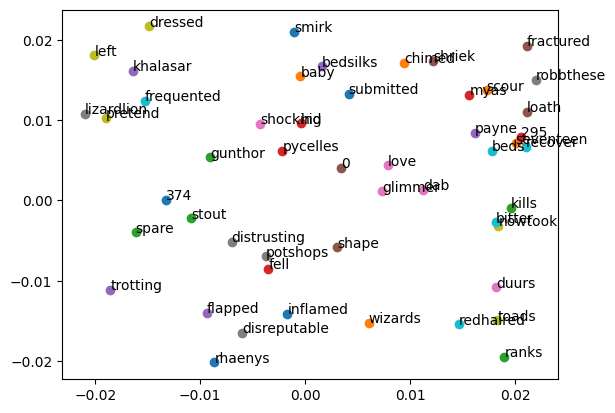

In [33]:
import matplotlib.pyplot as plt
words_10 = all_words[:50]
for word in words_10:
    corr = word_embedding_dict[word]
    plt.scatter(corr[0] , corr[1])
    plt.annotate(word , (corr[0] , corr[1]))
    